# Medical Cost Analysis ⚕💸

In the data set in this project, some information such as age, gender, body mass index, smoking, number of children and health expenditures are given. We will try to estimate the health expenditures of people according to these data. We will examine the effects of these features on health expenditures, one by one, and determine and visualize which one has the greater impact than the others.

In the next step, we will build our models using logistic regression, ridge classifier, decision tree, Naive Bayes and neural networks. After comparing the results of each model, we will find the model that performs best.


## Importing the required libraries

📌 First we import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Import Logistic Regression, Ridge Classifier, Decision Tree
# Gaussian Naive Bayes, MLP Classifier and Random Forest models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
# Import Classification Report function
from sklearn.metrics import classification_report

## Dataset and preprocessing

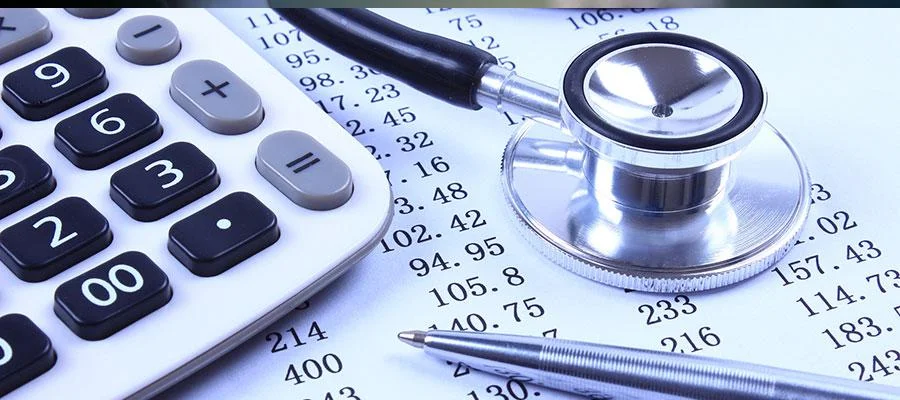

The dataset includes data from 1338 persons. Each of  these person samples have 6 features and medical cost.

### Read the data

Let’s read the .csv file.

📌 Use the read_csv() function of the Pandas library.

In [2]:
# Read the "insurance.csv" file
insurance = pd.read_csv("insurance.csv")
df=insurance.copy()

###Visualize the data
Then we take a look at the dataset using the data.head() function

In [3]:
# We use the head() function to display the first 5 rows of data // df.head(10) displays the first 10 rows.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now, to have a better understanding of the dataset, we can utilize some visualization techniques. For example, by creating a bar graph, we can compare the different classes.

We’ll start with finding the number of samples per class.

📌 Use the value_counts() method.

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# It is examined how many rows and columns the data consists of, whether the columns consist of categorical or numerical values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Values of numerical values such as mean, standard deviation, minimum, maximum are examined.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Use value_counts method on "sex" column of data object
#sex = df["sex"].value_counts()
#smoker=
#df["region"].value_counts().sort_index()
# Print the result
#sex
#smoker

In [6]:
## We look at the headings of our categorical data and the unique values under those headings.
for i in df.select_dtypes("object"):
    print(f"{i:<10}:", df[i].unique())

sex       : ['female' 'male']
smoker    : ['yes' 'no']
region    : ['southwest' 'southeast' 'northwest' 'northeast']


In [8]:
# We import the 'LabelEncoder' class to convert categorical data into numeric labels.
from sklearn.preprocessing import LabelEncoder
#sex
# The unique values of the 'sex' variable are retrieved. Fitting is performed on these values. (female=0, male=1)
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

# smoker or not
# The unique values of the 'smoker' variable are retrieved. Fitting is performed on these values. (no=0, yes=1)
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

#region
# The unique values of the 'smoker' variable are retrieved. Fitting is performed on these values. (northeast=0, northwest=1, southeast=2, southwest=3)
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

In [9]:

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
for col in df.columns:
    print(f"{col:<10}:", df[col].nunique())

age       : 47
sex       : 2
bmi       : 548
children  : 6
smoker    : 2
region    : 4
charges   : 1337


In [32]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt

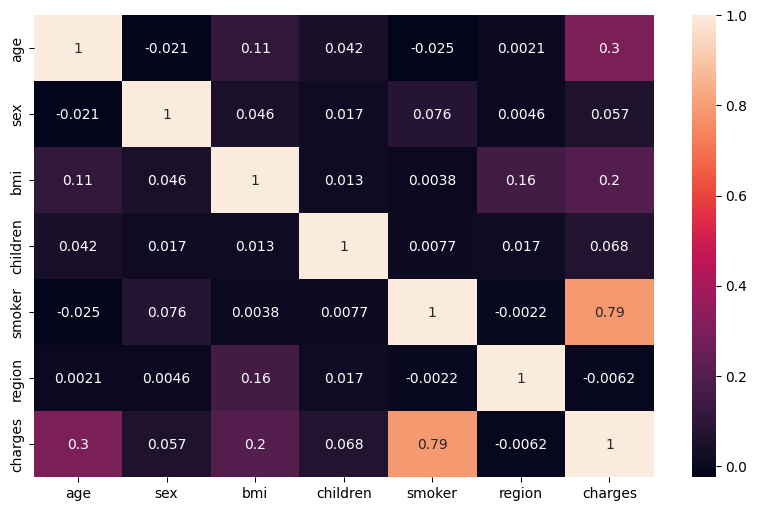

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot =True);

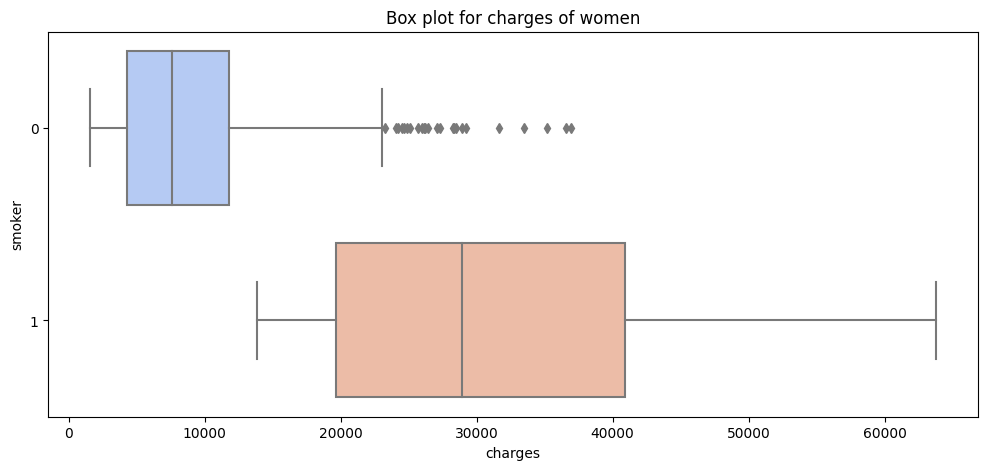

In [45]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = 'coolwarm');

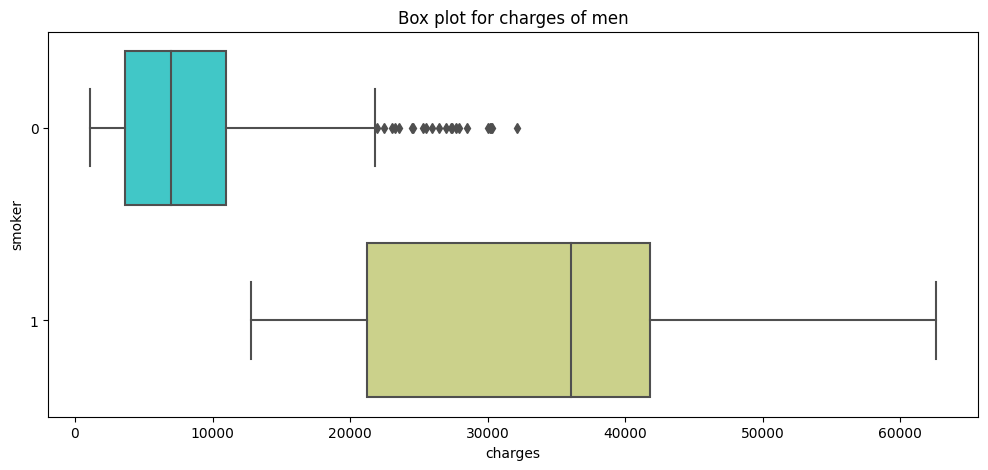

In [47]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'rainbow');

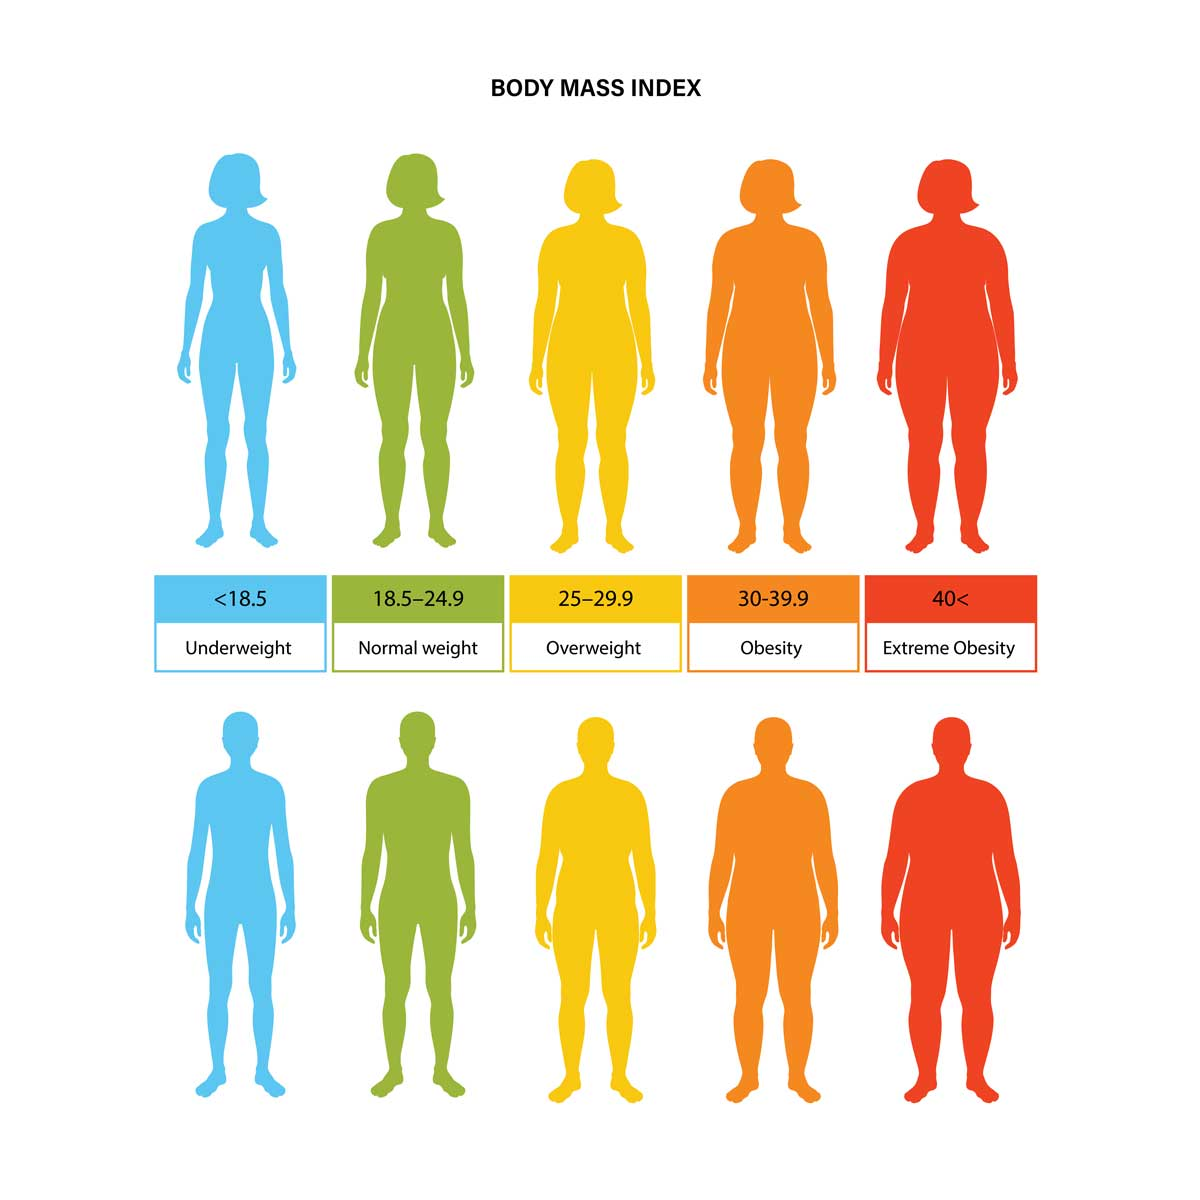
Body mass index is a measurement used to calculate body fat ratio based on a person's height and weight measurements. BMI is calculated by dividing weight in kilograms by the square of height in meters. BMI is used to determine whether a person's weight is normal, underweight, or overweight for their height, and is often used as a guide to help maintain a healthy body weight. However, BMI alone is not sufficient as a measure of health and other factors such as fat distribution, muscle mass, age, gender, genetic characteristics must also be taken into account.

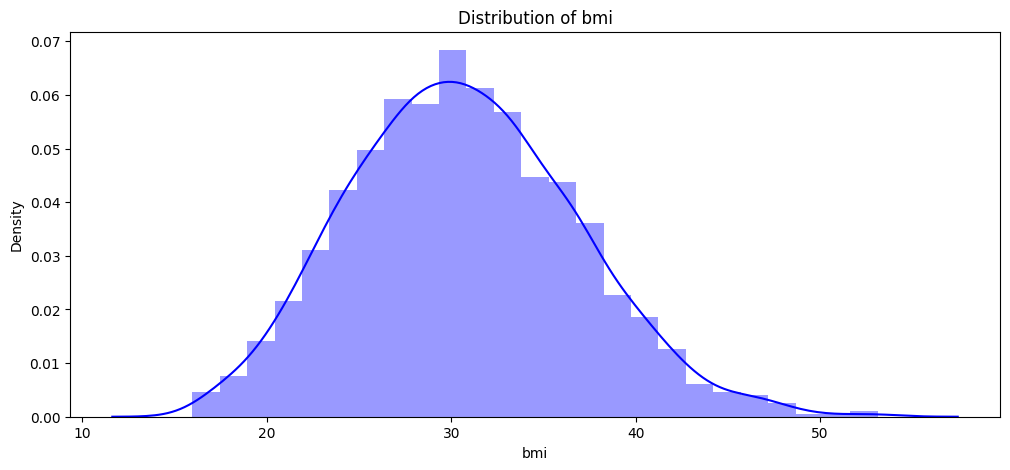

In [52]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df.bmi, color = 'b')

In [113]:
def transform_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal weight"
    elif 25 <= bmi < 30:
        return "Over weight"
    elif 30 <= bmi < 40:
        return "Obesity"
    else:
        return "Extreme Obesity"

df['bmi_class'] = df['bmi'].apply(transform_bmi)

In [117]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_class
0,19,0,27.900,0,1,3,16884.92400,Over weight
1,18,1,33.770,1,0,2,1725.55230,Obesity
2,28,1,33.000,3,0,2,4449.46200,Obesity
3,33,1,22.705,0,0,1,21984.47061,Normal weight
4,32,1,28.880,0,0,1,3866.85520,Over weight


In [107]:
df["bmi_class"].value_counts().sort_index()

0     20
1    225
2    386
3    616
4     91
Name: bmi_class, dtype: int64

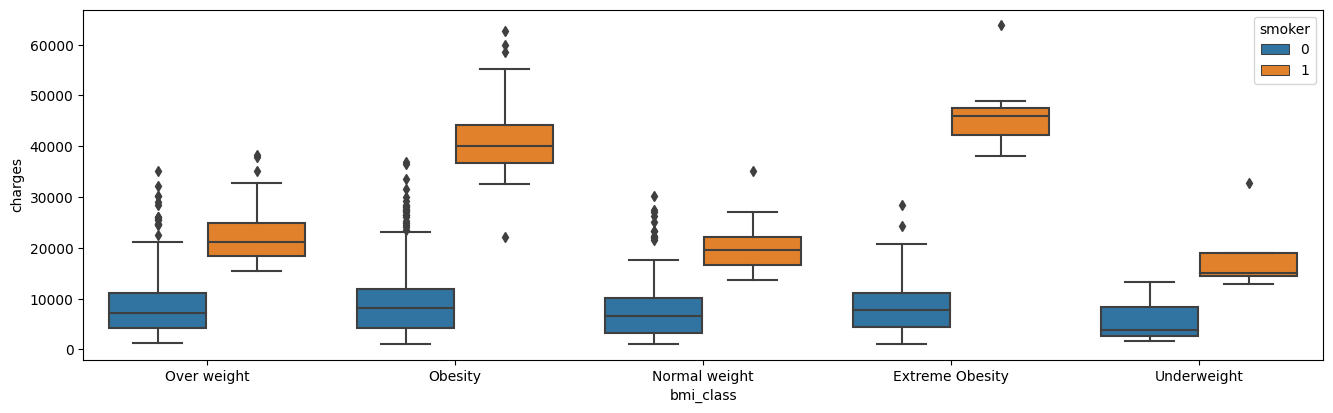

In [118]:
plt.figure(figsize=(16,10))
plt.subplot(211)
sns.boxplot(x="bmi_class", y="charges", hue="smoker", data=df, whis=1.5);

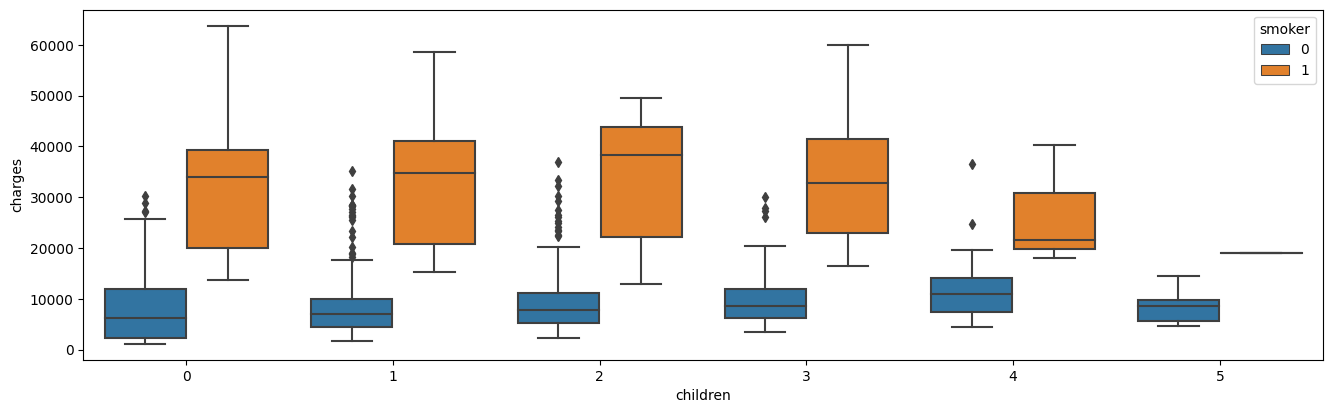

In [120]:
plt.figure(figsize=(16,10))
plt.subplot(211)
sns.boxplot(x="children", y="charges", hue="smoker", data=df, whis=1.5);

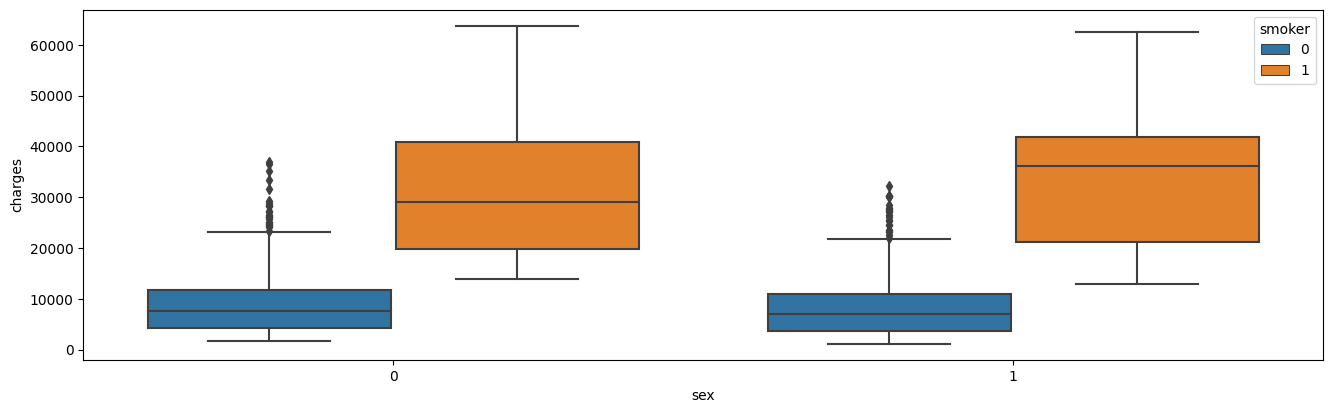

In [121]:
plt.figure(figsize=(16,10))
plt.subplot(211)
sns.boxplot(x="sex", y="charges", hue="smoker", data=df, whis=1.5);

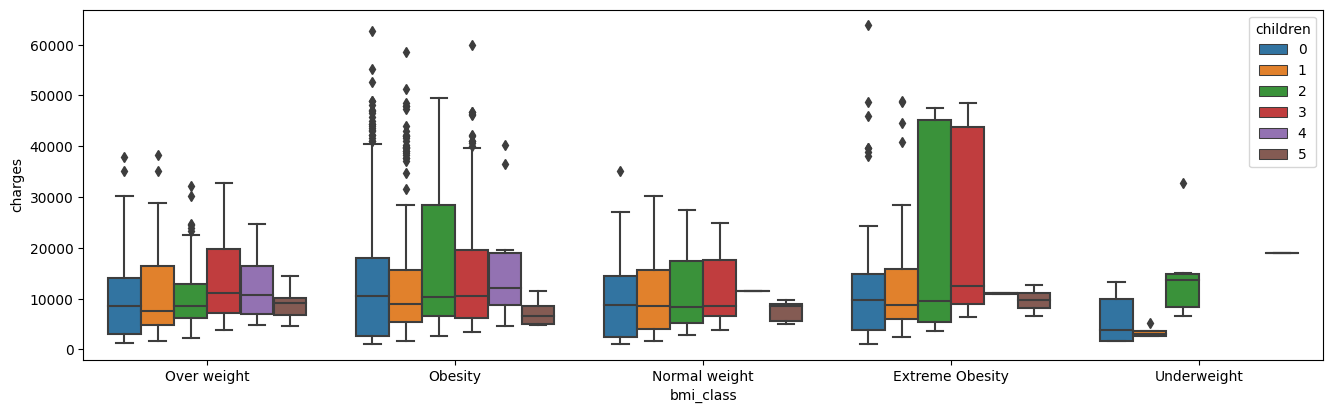

In [122]:
plt.figure(figsize=(16,10))
plt.subplot(211)
sns.boxplot(x="bmi_class", y="charges", hue="children", data=df, whis=1.5);

### Features and labels
Great, we have a better understanding of our data. Now we’ll divide it into features and corresponding labels.

In our case we’ll use the columns “cap-shape”, “cap-color”, “ring-number” and “ring-type” as features.

📌 Use the .loc() method to create X and y datasets.

In [ ]:
# Create the X variable for features
X = data.loc[:, [ "cap-shape" , "cap-color" , "ring-number" , "ring-type" ]]

# Create the y variable for output labels
y = data.loc[:, "class"]

###Converting the values

The values are in string format. We need to convert them to integer values to be able to perform mathematical operations with them. We’ll use label encoding for this.

📌 Since the X-data has multiple columns, do this in a for loop so that you can update all columns at once.

📌 For the y data, use the encoder directly.

In [ ]:
# Create an LabelEncoder object
encoder = LabelEncoder()

# Encode the features to integers inside a for loop
for i in X.columns:
  X[i] = encoder.fit_transform(X[i])

# Encode the ouput labels to integers
y = encoder.fit_transform(y)

Let’s print both X and y to see the final data.

In [ ]:
#Print X
X

,cap-shape,cap-color,ring-number,ring-type
0,5,4,1,4
1,5,9,1,4
2,0,8,1,4
3,5,8,1,4
4,5,3,1,0
...,...,...,...,...
8119,3,4,1,4
8120,5,4,1,4
8121,2,4,1,4
8122,3,4,1,0


In [ ]:
#Print y
y

array([1, 0, 0, ..., 0, 1, 0])

### Split the data
Finally, we can split our data into training and test datasets.

📌 Use the train_test_split function from sklearn.

In [ ]:
# Split the dataset into train and test sets with 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Creating and training models

Our data is ready to be used! Let’s move on to training on comparing our models.

We use the models we have imported already.

📌 Use the relevant class names to create models.

In [ ]:
# Create an object using the LogisticRegression() class
logistic_classifier_model = LogisticRegression()

# Create an object using the RidgeClassifier() class
ridge_classifier_model = RidgeClassifier()

# Create an object using the DecisionTreeClassifier() class
decision_tree_model = DecisionTreeClassifier()

# Create an object using the GaussianNB() class
naive_bayes_model = GaussianNB()

# Create an object using the MLPClassifier() class
neural_network_model = MLPClassifier()

Then, we train all models with the X_train and y_train dataset we created.

📌 Train all models using .fit() method of each object.

In [ ]:
# Train the Logistic Classifier model
logistic_classifier_model.fit(X_train, y_train)

# Train the Ridge Classifier model
ridge_classifier_model.fit(X_train, y_train)

# Train the Decision Tree model
decision_tree_model.fit(X_train, y_train)

# Train the Naive Bayes model
naive_bayes_model.fit(X_train, y_train)

# Train the Neural Network model
neural_network_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

Using the X_test set we make predictions with each model and save results to corresponding variables.

📌 Use the .predict() method on each model

In [ ]:
# Make prediction using the test dataset on Logistic Classifier model
logistic_pred = logistic_classifier_model.predict(X_test)

# Make prediction using the test dataset on Ridge Classifier model
ridge_pred = ridge_classifier_model.predict(X_test)

# Make prediction using the test dataset on Decision Tree model
tree_pred = decision_tree_model.predict(X_test)

# Make prediction using the test dataset on Naive Bayes model
naive_bayes_pred = naive_bayes_model.predict(X_test)

# Make prediction using the test dataset on Neural Network model
neural_network_pred = neural_network_model.predict(X_test)

##Comparing the performances

Instead of calculating precision, recall, f-1 score and accuracy separately we can create a report to compare the performances.

📌 classification_report() function is the one you have to use.

📌 Print the results of all models.

In [ ]:
# Create a Classification Report for Logistic Classifier model
logistic_report = classification_report(y_test, logistic_pred)

# Create a Classification Report for Ridge Classifier model
ridge_report = classification_report(y_test, ridge_pred)

# Create a Classification Report for Decision Tree model
tree_report = classification_report(y_test, tree_pred)

# Create a Classification Report for Naive Bayes model
naive_bayes_report = classification_report(y_test, naive_bayes_pred)

# Create a Classification Report for Neural Network model
neural_network_report = classification_report(y_test, neural_network_pred)

In [ ]:
# Print the report of the Logistic Regression model
print("***** Logistic Regression *****")
print(logistic_report)

# Print the report of the Ridge Regression model
print("***** Ridge Regression *****")
print(ridge_report)

# Print the report of the Decision Tree model
print("***** Decision Tree *****")
print(tree_report)

# Print the report of the Naive Bayes model
print("***** Naive Bayes *****")
print(naive_bayes_report)

# Print the report of the Neural Network model
print("***** Neural Network *****")
print(neural_network_report)

***** Logistic Regression *****
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1280
           1       0.77      0.79      0.78      1158

    accuracy                           0.79      2438
   macro avg       0.79      0.79      0.79      2438
weighted avg       0.79      0.79      0.79      2438

***** Ridge Regression *****
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1280
           1       0.77      0.79      0.78      1158

    accuracy                           0.79      2438
   macro avg       0.79      0.79      0.79      2438
weighted avg       0.79      0.79      0.79      2438

***** Decision Tree *****
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1280
           1       0.89      0.92      0.90      1158

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.

### Evaluation

Decision tree performed best. So maybe we can take things one step further and try the Random Forest algorithm to see if it works better.

📌 Follow the same steps and print the classification report for Random Forest

In [ ]:
# Create Random Forest Classifier object, train it and make predicitons
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)

In [ ]:
# Create a classification Report for Random Forest model
random_forest_report = classification_report(y_test, random_forest_pred)

# Print the classification report
print(random_forest_report)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1280
           1       0.89      0.92      0.90      1158

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.91      2438
weighted avg       0.91      0.91      0.91      2438

